<a href="https://colab.research.google.com/github/BhagwatPriyanka/CE888/blob/main/Lab2/Bootstrap%20Labwork_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
# data.shape

In [3]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
	# <---INSERT YOUR CODE HERE--->
  # data_mean = []
  # for i in range(n_bootstraps):
  #   random_sample = np.random.choice(x, replace = True, size = sample_size)
  #   random_sample_mean = np.mean(random_sample)
  #   data_mean.append(random_sample_mean)
  # # data_mean = np.array(data_mean)
  # lower = np.percentile(data_mean, 2.5)
  # upper = np.percentile(data_mean, 97.5)
  # return data_mean, lower, upper

  random_samples = np.random.choice(x, replace = True, size = [n_bootstraps, sample_size])
  data_mean = np.mean(random_samples)
  means = []
  for sample in random_samples:
    means.append(np.mean(sample))
  means = np.array(means)
  lower = np.percentile(means, 2.5)
  upper = np.percentile(means, 97.5)

  return data_mean, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

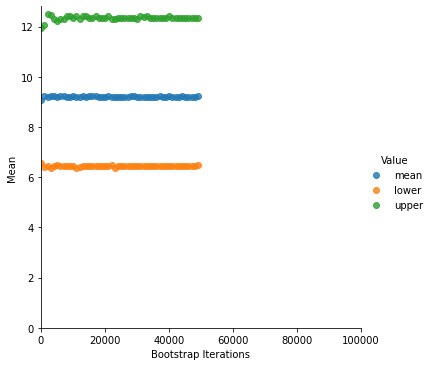

In [4]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [5]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
  random_samples = np.random.choice(sample, replace = True, size = [n_bootstraps, sample_size])
  data_mean = np.mean(random_samples)
  means = []
  for sample in random_samples:
    means.append(np.mean(sample))
  means = np.array(means)
  remove_lower = (100-ci)/2
  remove_upper = 100-remove_lower
  lower = np.percentile(means, remove_lower)
  upper = np.percentile(means, remove_upper)
  return data_mean, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


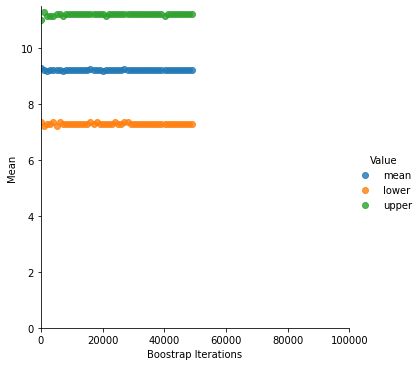

In [6]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.

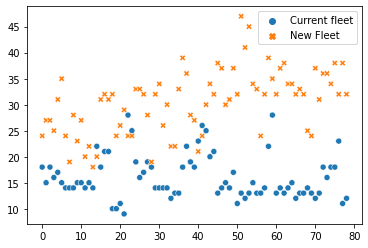

In [7]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->

#load the data
vehicles_data = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
vehicles_data.head()
vehicles_data.dropna(subset = ["New Fleet"], inplace = True)
# print(vehicles_data["New Fleet"])
# vehicles_data.shape

#plot
sns.scatterplot(data = vehicles_data)

# Note: you can add more cells as needed to organise your code and your plots

**Compare the two fleets**

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.

Calculate the mean of both samples.
Using the bootstrap function that you created:
Construct the 95% CI of the mean of the current fleet.
Construct the 95% CI of the mean of the new fleet.
Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [8]:
# <---INSERT YOUR CODE HERE--->
# 1)mean of samples
current_fleet_mean = np.mean(vehicles_data["Current fleet"])
new_fleet_mean = np.mean(vehicles_data["New Fleet"])
print("Mean of Current fleet:", current_fleet_mean)
print("Mean of New fleet:", new_fleet_mean)

Mean of Current fleet: 16.025316455696203
Mean of New fleet: 30.481012658227847


In [9]:
# 2)95% CI of the mean of the current fleet

bootstrap_mean_ci(vehicles_data["Current fleet"], len(vehicles_data["Current fleet"]), 20000, 95)

# boots = []
# for i in range(100, 50000, 1000):
#     boot = bootstrap_mean_ci(vehicles_data["Current fleet"], vehicles_data['Current fleet'].shape[0], i, 95)
#     boots.append([i, boot[0], "mean"])
#     boots.append([i, boot[1], "lower"])
#     boots.append([i, boot[2], "upper"])

# df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
# sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

# sns_plot.axes[0, 0].set_ylim(0,)
# sns_plot.axes[0, 0].set_xlim(0, 100000)

(16.022930379746835, 15.126582278481013, 16.962025316455698)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

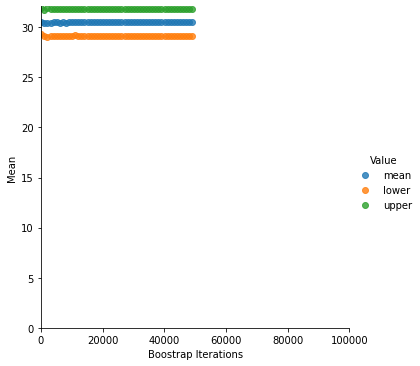

In [10]:
##95% CI of the mean of the new fleet
# bootstrap_mean_ci(vehicles_data["New Fleet"], len(vehicles_data["New Fleet"]), 20000, 95)


boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(vehicles_data["New Fleet"], vehicles_data['New Fleet'].shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

In [11]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    #getting the value for the test statistic
    sample1_mean = np.mean(sample1)
    sample2_mean = np.mean(sample2)
    tobs = sample2_mean - sample1_mean

    ###permutation testing
    #concatenating both samples
    concat_samples = np.concatenate((sample1,sample2))
    #permutating
    count = 0
    for i in range(n_permutations):
      perm = np.random.permutation(concat_samples)
      #split again to intital sized array
      pold = perm[:int(len(perm)/2)]
      pnew = perm[int(len(perm)/2):]
      pold_mean = np.mean(pold)
      pnew_mean = np.mean(pnew)
      tperm = pnew_mean - pold_mean
      if tperm > tobs:
        count += 1

    #p-value
    pvalue = count/n_permutations

    return pvalue

In [12]:
permut_test(vehicles_data["Current fleet"], vehicles_data["New Fleet"], 1000)

0.0

In [13]:
### This code is for writing and testing with the data in class notes

x = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])
y = np.array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]) 
x_mean = np.mean(x)
y_mean = np.mean(y)
t_obs_1 = y_mean - x_mean
len_1 = x.size
len_2 = y.size
print(len_1)
  
temp_x = x
temp_y = y
count = 0
for i in range(0, 20000):
  new_data = np.hstack([temp_x,temp_y])
  np.random.shuffle(new_data) 
  temp_x = np.array(new_data[:len_1])
  temp_y = np.array(new_data[len_2:])
  t_perm_1 = np.mean(temp_y) - np.mean(temp_x)
  if t_perm_1 > t_obs_1:
    count+= 1
  
p_value = count/20000
print(p_value)

11
0.0308


In [14]:
# bootstrap for Standard deviation 

def bootstrap_sd_ci(sample, sample_size, n_bootstraps, ci):
  boot_sd = []
  bootstrap = np.random.choice(sample, (n_bootstraps, sample_size))
  data_sd = np.std(bootstrap)
  for boot in bootstrap:
     boot_sd.append(np.std(boot))
  alpha = (100 - ci) / 2
  lower = np.percentile(boot_sd, alpha)
  upper = np.percentile(boot_sd, 100 - alpha)

  return data_sd,lower,upper

# Quiz Attempt

In [15]:
#Question 2 : The 85% confidence interval for the mean of the old fleet in the vehicles dataset using 10000 iterations

vehicles_lower_upper = bootstrap_mean_ci(vehicles_data["Current fleet"], len(vehicles_data["Current fleet"]), 10000, 85)
vehicles_upper = round(vehicles_lower_upper[2],2)
vehicles_lower = round(vehicles_lower_upper[1],2)

print(vehicles_lower, vehicles_upper)

15.37 16.7


In [16]:
#Question 3: The 80% confidence interval for the mean of the customers dataset using 10000 iterations

customers_lower_upper = bootstrap_mean_ci(data, data.shape[0], 10000, 80)
customers_upper = round(customers_lower_upper[2],2)
customers_lower = round(customers_lower_upper[1],2)

print(customers_lower, customers_upper)

7.29 11.21


In [17]:
#Question 4: The 95% confidence interval for the standard deviation of the new fleet in the vehicles dataset using 10000 iterations

new_lower_upper = bootstrap_sd_ci(vehicles_data["New Fleet"], len(vehicles_data["New Fleet"]), 10000, 95)
new_upper = round(new_lower_upper[2],2)
new_lower = round(new_lower_upper[1],2)

print(new_lower, new_upper)

5.13 6.9


In [18]:
#Question 5: The 95% confidence interval for the standard deviation of the customers dataset using 10000 iterations 

customers_lower_upper = bootstrap_sd_ci(data, data.shape[0], 10000, 95)
customers_upper = round(customers_lower_upper[2],2)
customers_lower = round(customers_lower_upper[1],2)

print(customers_lower, customers_upper)

2.69 7.34


In [19]:
#Question 8: 
# The variables below represent the percentages of democratic votes in Pennsylvania and Ohio (one value for each state).
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]


print(len(dem_share_PA), len(dem_share_OH))
share_PA = np.array(dem_share_PA)
share_OH = np.array(dem_share_OH)

#print(np.mean(share_PA), np.mean(share_OH))

#Q8: The 98% confidence intervals for the means of the votes using 100000 bootstraps
PA_UpperLower = bootstrap_mean_ci(share_PA, share_PA.shape[0], 100000,98)
PA_upper = round(PA_UpperLower[2],2)
PA_lower = round(PA_UpperLower[1],2)

OH_UpperLower = bootstrap_mean_ci(share_OH, share_OH.shape[0], 100000,98)
OH_upper = round(OH_UpperLower[2],2)
OH_lower = round(OH_UpperLower[1],2)

print("for PA: {},{}".format(PA_upper, PA_lower))
print("for OH: {},{}".format(OH_upper, OH_lower))

#taking out the p-value

print(round(permut_test(dem_share_PA, dem_share_OH, 30000),3))

67 88
for PA: 48.34,42.8
for OH: 46.78,41.87
0.77
